<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_3_0_7_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.183817,56.919202,0.824758,163.927777,163.213142,0.714635
1,0.0,1.0,71.694843,20.324134,0.459102,102.478079,101.973809,0.504270
2,0.0,2.0,36.228762,62.719439,0.607885,109.556086,108.772094,0.783992
3,0.0,3.0,57.283445,71.467788,-0.319031,138.432203,138.686266,-0.254063
4,0.0,4.0,38.147199,24.429008,0.587890,73.164098,72.371728,0.792370
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.014792,88.609205,0.170909,149.794906,149.886291,-0.091385
59996,999.0,56.0,91.739272,54.030443,-0.977135,154.792580,155.781400,-0.988820
59997,999.0,57.0,86.335992,37.520002,0.863060,134.719053,133.790654,0.928399
59998,999.0,58.0,70.798375,41.085077,-0.614685,121.268767,121.863405,-0.594638


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.183817  56.919202  0.824758  163.927777  163.213142  0.714635
      1.0    71.694843  20.324134  0.459102  102.478079  101.973809  0.504270
      2.0    36.228762  62.719439  0.607885  109.556086  108.772094  0.783992
      3.0    57.283445  71.467788 -0.319031  138.432203  138.686266 -0.254063
      4.0    38.147199  24.429008  0.587890   73.164098   72.371728  0.792370
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.014792  88.609205  0.170909  149.794906  149.886291 -0.091385
      56.0   91.739272  54.030443 -0.977135  154.792580  155.781400 -0.988820
      57.0   86.335992  37.520002  0.863060  134.719053  133.790654  0.928399
      58.0   70.798375  41.085077 -0.614685  121.268767  121.863405 -0.594638
      59.0   20.895887  92.025962 -0.103551  122.818298  123.253679 -0.435381

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.183817  56.919202  0.824758  163.927777  163.213142  0.714635
      1.0    71.694843  20.324134  0.459102  102.478079  101.973809  0.504270
      2.0    36.228762  62.719439  0.607885  109.556086  108.772094  0.783992
      3.0    57.283445  71.467788 -0.319031  138.432203  138.686266 -0.254063
      4.0    38.147199  24.429008  0.587890   73.164098   72.371728  0.792370
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.014792  88.609205  0.170909  149.794906  149.886291 -0.091385
      56.0   91.739272  54.030443 -0.977135  154.792580  155.781400 -0.988820
      57.0   86.335992  37.520002  0.863060  134.719053  133.790654  0.928399
      58.0   70.798375  41.085077 -0.614685  121.268767  121.863405 -0.594638
      59.0   20.895887  92.025962 -0.103551  122.818298  123.253679 -0.435381

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.183817,56.919202,0.824758,163.927777,163.213142,0.714635
1,0.0,1.0,71.694843,20.324134,0.459102,102.478079,101.973809,0.504270
2,0.0,2.0,36.228762,62.719439,0.607885,109.556086,108.772094,0.783992
3,0.0,3.0,57.283445,71.467788,-0.319031,138.432203,138.686266,-0.254063
4,0.0,4.0,38.147199,24.429008,0.587890,73.164098,72.371728,0.792370
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.014792,88.609205,0.170909,149.794906,149.886291,-0.091385
59996,999.0,56.0,91.739272,54.030443,-0.977135,154.792580,155.781400,-0.988820
59997,999.0,57.0,86.335992,37.520002,0.863060,134.719053,133.790654,0.928399
59998,999.0,58.0,70.798375,41.085077,-0.614685,121.268767,121.863405,-0.594638


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.183817  56.919202  0.824758  163.927777  163.213142  0.714635
      1.0    71.694843  20.324134  0.459102  102.478079  101.973809  0.504270
      2.0    36.228762  62.719439  0.607885  109.556086  108.772094  0.783992
      3.0    57.283445  71.467788 -0.319031  138.432203  138.686266 -0.254063
      4.0    38.147199  24.429008  0.587890   73.164098   72.371728  0.792370
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.014792  88.609205  0.170909  149.794906  149.886291 -0.091385
      56.0   91.739272  54.030443 -0.977135  154.792580  155.781400 -0.988820
      57.0   86.335992  37.520002  0.863060  134.719053  133.790654  0.928399
      58.0   70.798375  41.085077 -0.614685  121.268767  121.863405 -0.594638
      59.0   20.895887  92.025962 -0.103551  122.818298  123.253679 -0.435381

[60000 rows x 6 columns]

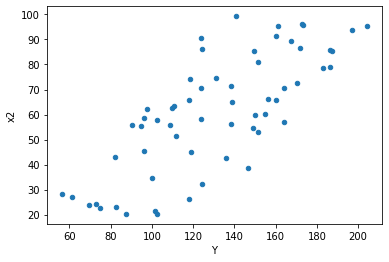

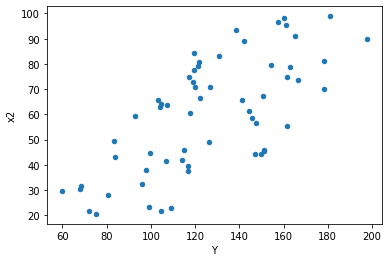

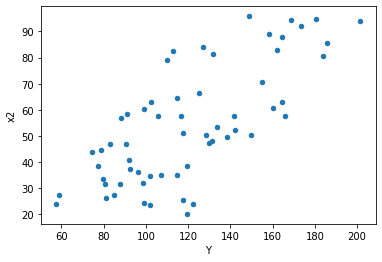

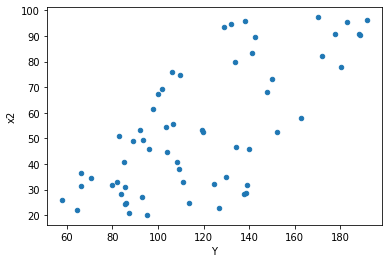

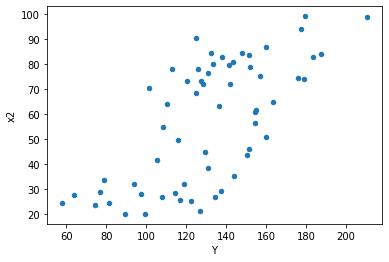

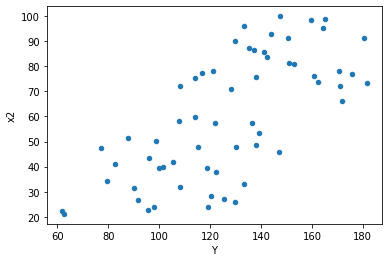

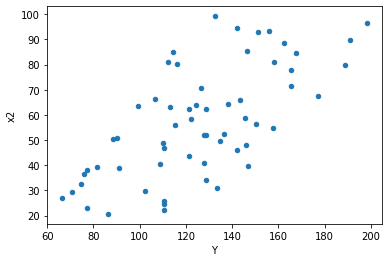

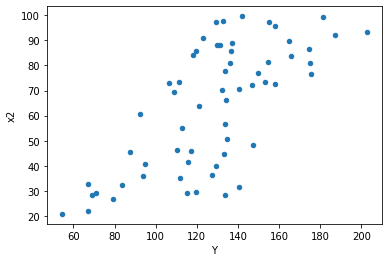

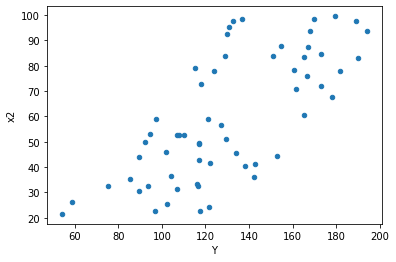

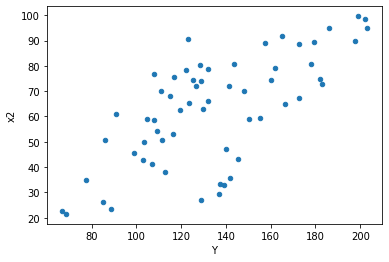

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,29.0,27.0,14.329956541794584,17.999974742751192,0.4941364324756753,0.6666657312130071,1.3491531637789627,0.4368964289379611,0.7815517855310194,0.21844821446898055,Reject001=1 : Homoscedasticity
1.0,22.0,34.0,8.299222954987629,23.52424525146455,0.3772374070448922,0.6918895662195456,1.8340958592614038,0.1088568965115928,0.9455715517442036,0.0544284482557964,Reject001=1 : Homoscedasticity
5.0,27.0,29.0,8.117592267696299,15.103216834266497,0.3006515654702333,0.5208005804919482,1.732239709703129,0.14984426011653196,0.925077869941734,0.07492213005826598,Reject001=1 : Homoscedasticity
6.0,26.0,30.0,13.506011673296975,17.10501760142385,0.519461987434499,0.570167253380795,1.0976111191440925,0.8003526397321221,0.5998236801339389,0.40017631986606106,Reject001=1 : Homoscedasticity
9.0,38.0,18.0,18.98647565643007,12.789508602984759,0.49964409622184397,0.7105282557213755,1.4220687507251124,0.427128513637719,0.7864357431811405,0.2135642568188595,Reject001=1 : Homoscedasticity
10.0,29.0,27.0,15.727222497667515,19.42261266504145,0.5423180171609489,0.7193560246311648,1.32644684828473,0.4633464420282931,0.7683267789858534,0.23167322101414656,Reject001=1 : Homoscedasticity
14.0,35.0,21.0,21.118776037248352,13.629380317911831,0.6033936010642387,0.6490181103767538,1.0756131805707663,0.8793916285224666,0.5603041857387667,0.4396958142612333,Reject001=1 : Homoscedasticity
15.0,32.0,24.0,12.795527399999395,12.183063405424777,0.3998602312499811,0.507627641892699,1.2695127002398616,0.5506242575734044,0.7246878712132978,0.2753121287867022,Reject001=1 : Homoscedasticity
16.0,23.0,33.0,4.856107891986661,16.371720353804406,0.21113512573855048,0.4961127379940729,2.3497404150951717,0.024439576150225406,0.9877802119248873,0.012219788075112703,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,27.0,14.329956541794584,17.999974742751192,0.4941364324756753,0.6666657312130071,1.3491531637789627,0.4368964289379611,Reject001=1 : Homoscedasticity
1.0,22.0,34.0,8.299222954987629,23.52424525146455,0.3772374070448922,0.6918895662195456,1.8340958592614038,0.1088568965115928,Reject001=1 : Homoscedasticity
2.0,35.0,21.0,14.386103919676083,6.285493763289206,0.4110315405621738,0.2993092268232955,0.7281904118937588,0.39702820259002547,Reject001=1 : Homoscedasticity
3.0,32.0,24.0,16.175043519055933,8.301399779708277,0.5054701099704979,0.34589165748784484,0.6842969557745621,0.313082568550824,Reject001=1 : Homoscedasticity
4.0,26.0,30.0,18.36811538946869,18.80128397580458,0.7064659765180266,0.6267094658601526,0.8871049515350031,0.7613489671000649,Reject001=1 : Homoscedasticity
5.0,27.0,29.0,8.117592267696299,15.103216834266497,0.3006515654702333,0.5208005804919482,1.732239709703129,0.14984426011653196,Reject001=1 : Homoscedasticity
6.0,26.0,30.0,13.506011673296975,17.10501760142385,0.519461987434499,0.570167253380795,1.0976111191440925,0.8003526397321221,Reject001=1 : Homoscedasticity
7.0,23.0,33.0,18.126660996449456,10.520590027842804,0.7881156954978025,0.3188057584194789,0.40451644376668533,0.02657382751401127,Reject001=1 : Homoscedasticity
8.0,35.0,21.0,15.937100034096716,8.686276762234604,0.45534571525990614,0.4136322267730764,0.9083916086417544,0.7813840465605392,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      975
Reject001=0 : Heteroscedasticity     25
Name: Result_test, dtype: int64